# Viz for labeling data

## First: convert 

In [3]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal 
from sklearn.decomposition import PCA
import argparse
import pandas as pd

import sys  
sys.path.insert(1, '/home/stdi2687/gnss-leo-data/scripts')

from feature_extract_util import *

## Viz for labeling
### 1. Chang's labels

Filename           scnPhs_2023.144.125.01.02.G25.SC001_0001.0001_nc
Approx time (s)                                                 NaN
Label                                                           if?
Unnamed: 4                                                      NaN
Unnamed: 5                                                      if?
labeled?                                                      False
Name: 504, dtype: object
2023.144.125.01.02.G25.SC001_0001


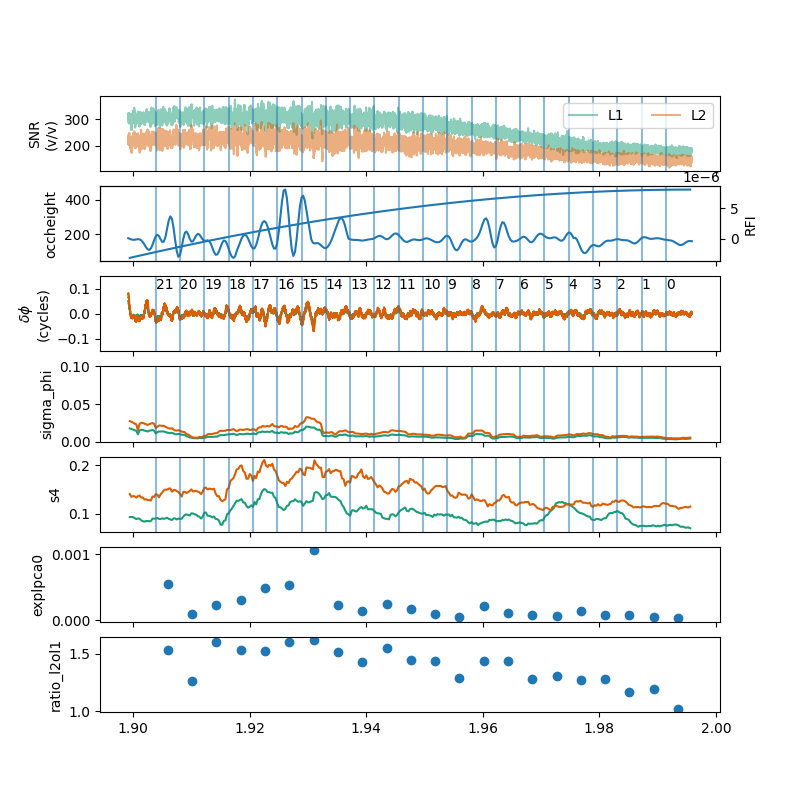

In [12]:
label_df=pd.read_pickle('../data/converted_labels.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
print(row)
sample=row.Filename[7:-8]
print(sample)
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling/%s_features.png" %sample)

In [13]:
label_df

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,scnPhs_2023.144.103.01.01.E33.SC001_0001.0001_nc,NaN,a/l,NaN,a,True
1,scnPhs_2023.144.103.01.01.G10.SC001_0001.0001_nc,NaN,l,NaN,l,True
2,scnPhs_2023.144.103.01.01.G25.SC001_0001.0001_nc,1.29,ie,sporadic E,ie,True
3,scnPhs_2023.144.103.01.01.G26.SC001_0001.0001_nc,1.48,ie,sporadic E,ie,True
4,scnPhs_2023.144.103.01.01.G27.SC001_0001.0001_nc,NaN,l,NaN,l,True
...,...,...,...,...,...,...
595,scnPhs_2023.144.125.05.01.G15.SC001_0001.0001_nc,NaN,NaN,NaN,NaN,False
596,scnPhs_2023.144.125.06.01.E10.SC001_0001.0001_nc,NaN,r????,NaN,r,False
597,scnPhs_2023.144.125.06.01.G05.SC001_0001.0001_nc,NaN,if,NaN,if,False
598,scnPhs_2023.144.125.10.01.R15.SC001_0001.0001_nc,NaN,if,NaN,if,False


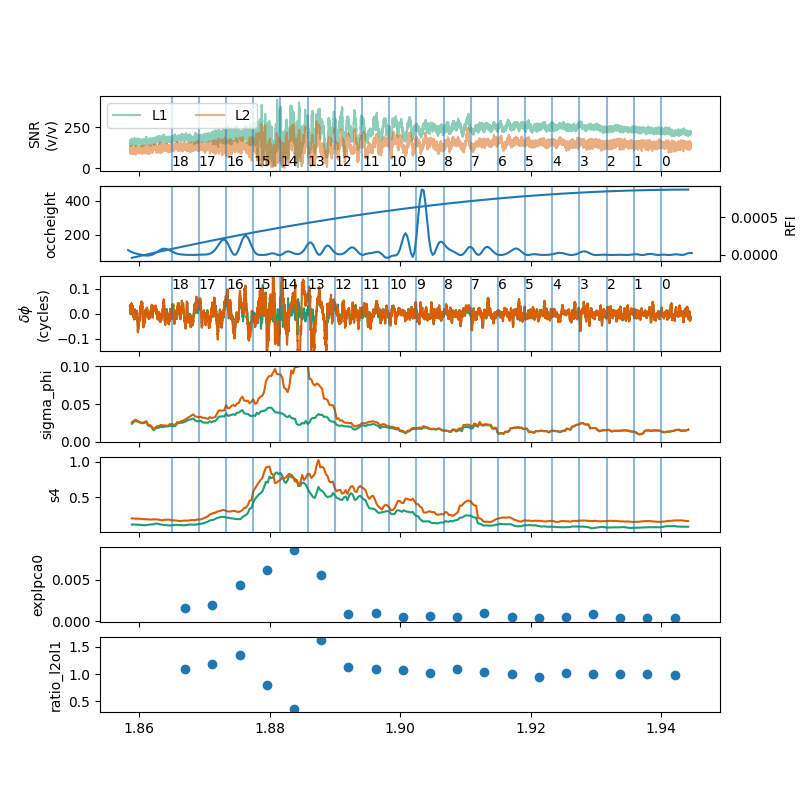

In [11]:
#labeled as IF, but ratio is inverse?
sample='2023.144.103.01.02.G11.SC001_0001' 
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling/%s_features.png" %sample)

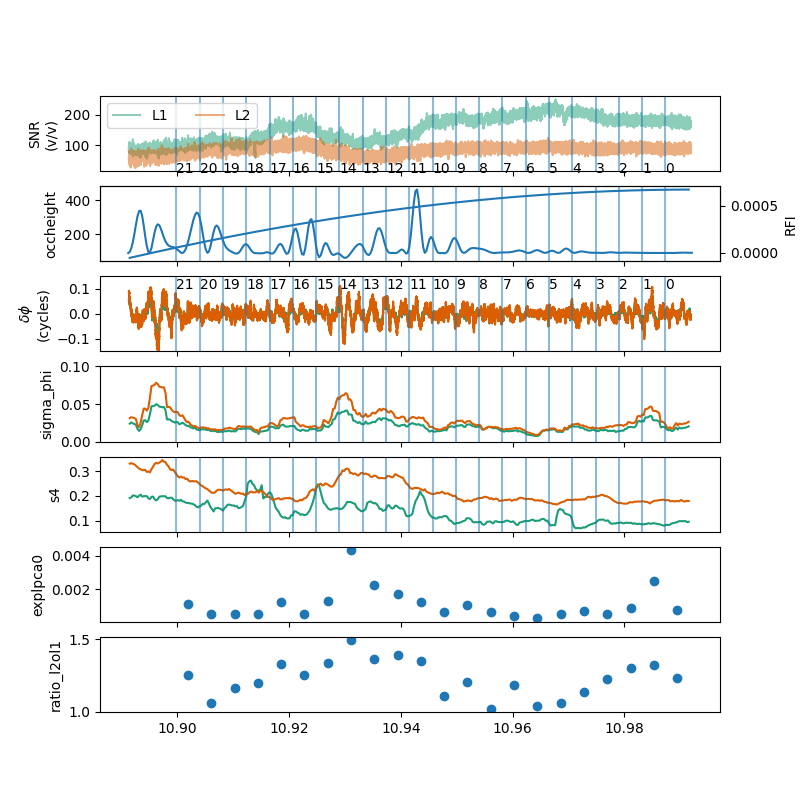

In [12]:
#Labeled as low SNR, but looks like signal?
sample='2023.144.103.10.02.G09.SC001_0001' 
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling/%s_features.png" %sample)

### 2. Comms labels

Filename           2023.066.133.20.01.G10.SC001_0001
Approx time (s)                                  NaN
Label                                      Comms RFI
Unnamed: 4                                       NaN
Unnamed: 5                                       NaN
labeled?                                       False
Name: 80, dtype: object
2023.066.133.20.01.G10.SC001_0001


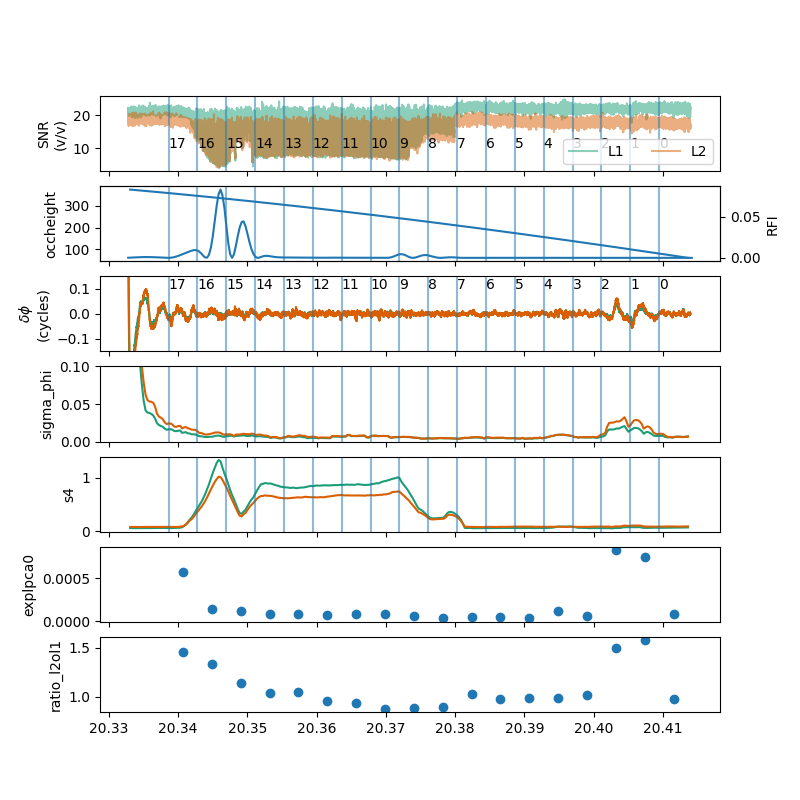

In [102]:
label_df=pd.read_pickle('../data/converted_labels_comms.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
print(row)
#sample=row.Filename[7:-8]
sample=row.Filename
print(sample)
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling_rfi/%s_features.png" %sample)

### 3. scint labels

In [26]:
#label_df=pd.read_pickle('../data/converted_labels_scint.pkl')
label_df=pd.read_pickle('../data/converted_labels_scint_v2.pkl')
row=label_df[label_df["labeled?"]==False].iloc[0]
print(row)
#sample=row.Filename[7:-8]
sample=row.Filename
print(sample)
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling_rfi/%s_features.png" %sample)

IndexError: single positional indexer is out-of-bounds

In [9]:
label_df[label_df["labeled?"]==False]

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2023.080.115.15.01.G29.SC001_0001,NaN,Scint 2,NaN,NaN,False
1,2023.080.117.23.01.G12.SC001_0001,NaN,Scint 2,NaN,NaN,False
2,2023.080.119.04.01.G23.SC001_0001,NaN,Scint 2,NaN,NaN,False
3,2023.080.120.10.01.G18.SC001_0001,NaN,Scint 2,NaN,NaN,False
4,2023.080.125.18.02.G23.SC001_0001,NaN,Scint 2,NaN,NaN,False
5,2023.080.128.03.01.G29.SC001_0001,NaN,Scint 2,NaN,NaN,False
6,2023.080.128.13.01.G10.SC001_0001,NaN,Scint 2,NaN,NaN,False
7,2023.080.129.12.01.G23.SC001_0001,NaN,Scint 2,NaN,NaN,False
8,2023.080.129.14.01.G10.SC001_0001,NaN,Scint 2,NaN,NaN,False
9,2023.080.133.11.02.G17.SC001_0001,NaN,Scint 2,NaN,NaN,False


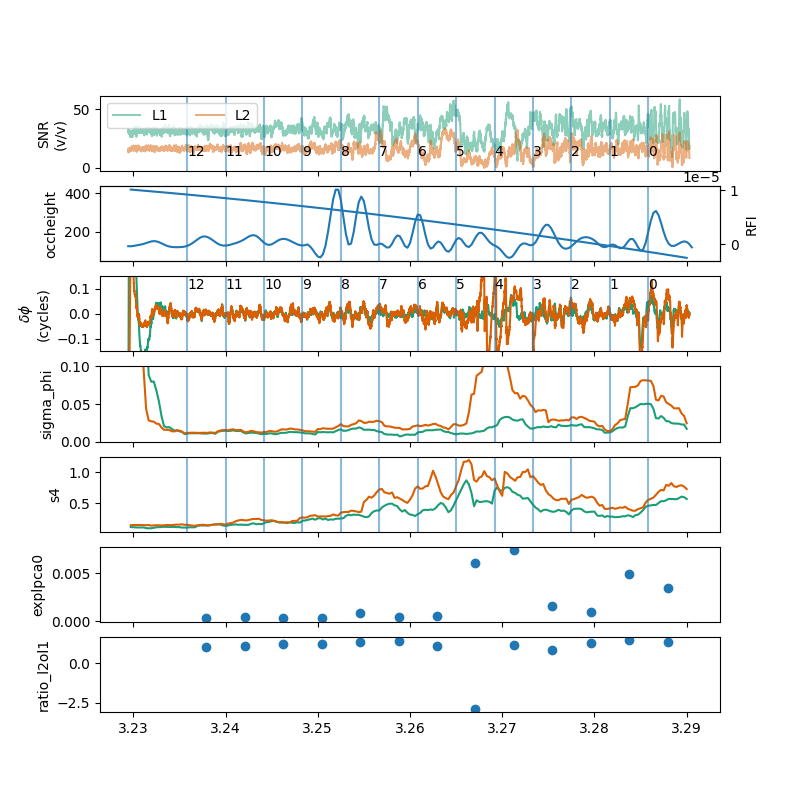

In [6]:



#3:7 F Scintillation, 0:2 E?
sample='2023.080.119.03.01.G29.SC001_0001' 
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling_rfi/%s_features.png" %sample)

In [ ]:
2023.080.119.18.02.G12.SC001_0001
5:14 Scint?

2023.080.120.07.02.G01.SC001_0001
nice scint
2023.080.124.19.02.G10.SC001_0001
2023.081.162.13.02.G05.SC001_0001

2023.082.149.08.01.G18.SC001_0001
phase and amplitude


'2023.080.119.03.01.G29.SC001_0001'
labeled 4:6 processing artifact? (cycle slips)
0:1 scint 

2023.080.135.07.02.G32.SC001_0001
osc due to inverse ratio/

2023.080.149.18.01.G04.SC001_0001
scint then 8:10 is artifact: cslips?
similar:
2023.081.119.03.01.G29.SC001_0001


2023.082.132.09.01.R04.SC001_0001
cycle slip

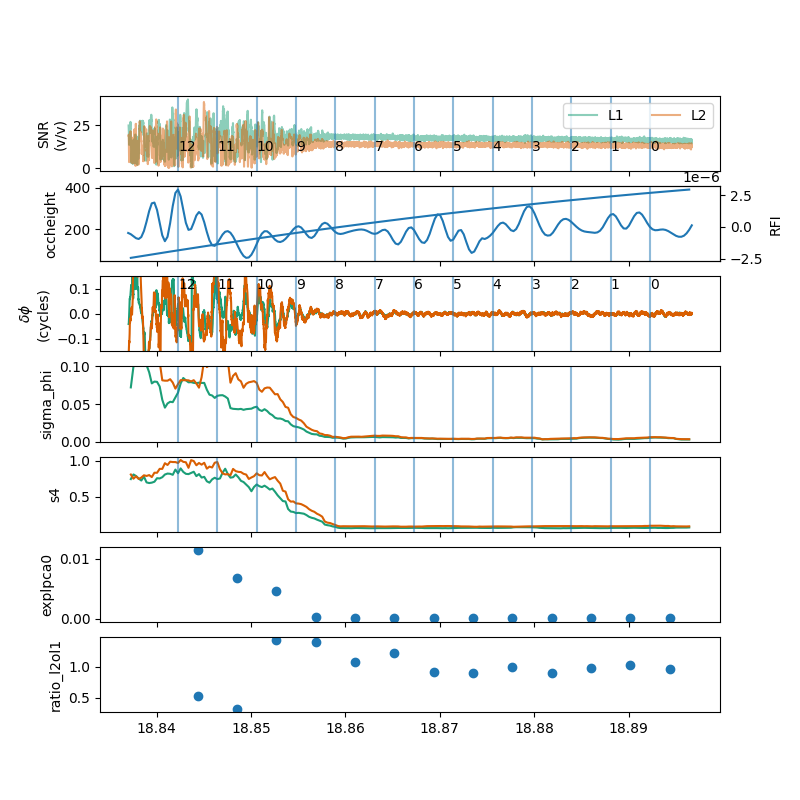

In [1]:
#3:7 F Scintillation, 0:2 E?
sample='2023.080.149.18.01.G04.SC001_0001' 
sample='2023.080.135.18.02.G10.SC001_0001'
from IPython.display import Image #/home/stdi2687/gnss-leo-data/figures/labeling/
Image(filename="/home/stdi2687/gnss-leo-data/figures/labeling_rfi/%s_features.png" %sample)